In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('salary.csv').dropna()

In [9]:
df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


In [21]:
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [97]:
#df = df.drop(['exprior','degree','otherqual','yearsabs'], axis =1)

In [69]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=10)

### 1.Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

In [70]:
train.describe()

,salary,yearsworked,yearsrank,market,position,male,Field
count,410.00000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,49984.68689,12.353659,6.743902,0.941902,2.082927,0.736585,2.558537
std,12455.34791,9.464865,6.315292,0.146044,0.832089,0.441024,1.120050
min,29000.00000,0.000000,0.000000,0.710000,1.000000,0.000000,1.000000
25%,39583.25000,3.250000,2.000000,0.840000,1.000000,0.000000,2.000000
50%,48268.50000,10.500000,4.000000,0.910000,2.000000,1.000000,3.000000
75%,59767.25000,21.000000,11.000000,1.000000,3.000000,1.000000,4.000000
max,90082.00000,35.000000,25.000000,1.330000,3.000000,1.000000,4.000000


### Visualizations

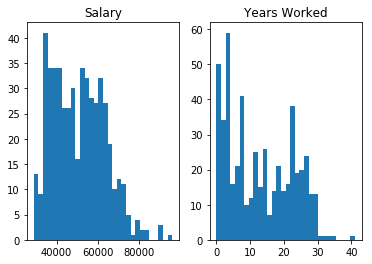

In [71]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.hist(df['salary'], bins=30)
plt.title('Salary')

plt.subplot(1, 2, 2)
plt.hist(df['yearsworked'], bins=30)
plt.title('Years Worked')

plt.show()

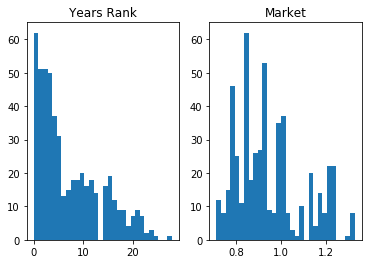

In [49]:
plt.subplot(1, 2, 1)
plt.hist(df['yearsrank'], bins=30)
plt.title('Years Rank')

plt.subplot(1, 2, 2)
plt.hist(df['market'], bins=30)
plt.title('Market')

plt.show()

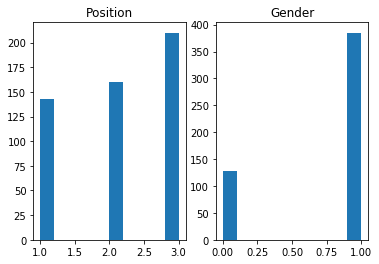

In [50]:
plt.subplot(1, 2, 1)
plt.hist(df['position'])
plt.title('Position')

plt.subplot(1, 2, 2)
plt.hist(df['male'])
plt.title('Gender')

plt.show()

Text(0.5, 1.0, 'Field')

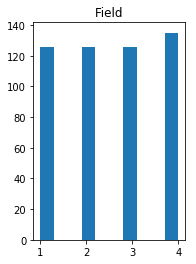

In [51]:
plt.subplot(1, 2, 1)
plt.hist(df['Field'])
plt.title('Field')


Text(0.5, 1.0, 'salary & year rank')

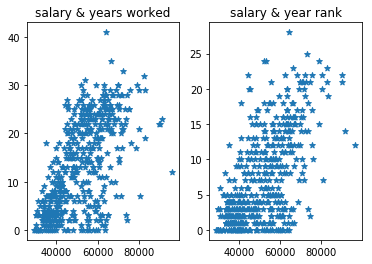

In [57]:
plt.subplot(1,2,1)
plt.scatter(x = df['salary'], y= df['yearsworked'], marker='*')
plt.title('salary & years worked')

plt.subplot(1,2,2)
plt.scatter(x = df['salary'], y= df['yearsrank'], marker='*')
plt.title('salary & year rank')

Text(0.5, 1.0, 'salary & position')

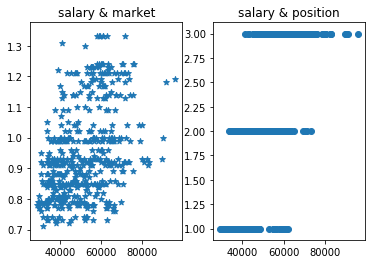

In [59]:
plt.subplot(1,2,1)
plt.scatter(x = df['salary'], y= df['market'], marker='*')
plt.title('salary & market')

plt.subplot(1,2,2)
plt.scatter(x = df['salary'], y= df['position'])
plt.title('salary & position')

Text(0.5, 1.0, 'salary & field')

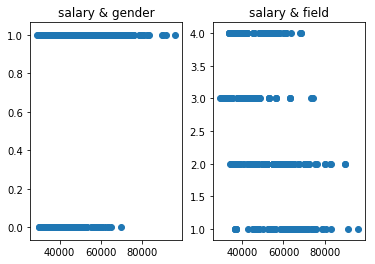

In [63]:
plt.subplot(1,2,1)
plt.scatter(x = df['salary'], y= df['male'])
plt.title('salary & gender')

plt.subplot(1,2,2)
plt.scatter(x = df['salary'], y= df['Field'])
plt.title('salary & field')

### 2.One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

In [75]:
dummies = pd.get_dummies(train['Field'])
dummies.head()

,1,2,3,4
175,0,1,0,0
456,0,1,0,0
174,0,1,0,0
50,0,0,0,1
392,0,0,1,0


### Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

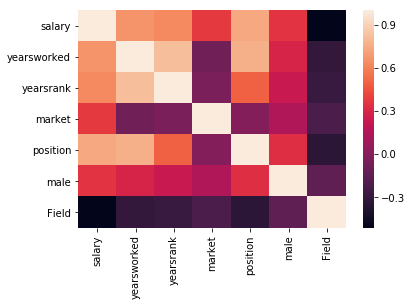

In [77]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [81]:
X = train[['yearsworked', 'yearsrank','market','position','male','Field']]

y = train['salary']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     306.1
Date:                Wed, 22 May 2019   Prob (F-statistic):          1.15e-146
Time:                        14:21:25   Log-Likelihood:                -4095.9
No. Observations:                 410   AIC:                             8206.
Df Residuals:                     403   BIC:                             8234.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4382.7722   2280.133      1.922      0.055     -99.667    8865.212
yearsworked  -255.4786     70.734     -3.612      0.000    -394.532    -116.425
yearsrank     894.7049     78.392     11.413      0.000     740.597    1048.813
market       2.978e+04   1891.758     15.744      0.000    2.61e+04    3.35e+04
position     8937.4483    550.666     16.230      0.000    7854.912       1e+04
male          877.0221    643.165      1.364      0.173    -387.356    2141.400
Field       -1794.2942    260.241     -6.895      0.000   -2305.894   -1282.694
==============================================================================
Omnibus:                       33.386   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.372
Skew:                           0.611   Prob(JB):                     1.40e-10
Kurtosis:                       4.077   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

In [89]:
standardized_residuals = model.resid
standardised_predicted_values = model.fittedvalues

print(standardized_residuals.head())
print(standardised_predicted_values.head())

175    6781.386490
456   -8910.287331
174      55.943115
50     -802.656472
392   -1489.085069
dtype: float64
175    49470.613510
456    47482.287331
174    50782.056885
50     42890.656472
392    32489.085069
dtype: float64


### Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

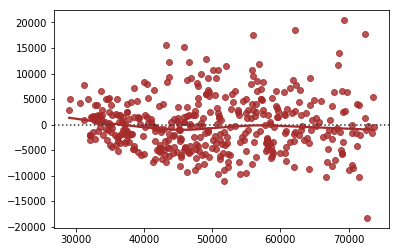

In [94]:
sns.residplot(standardised_predicted_values, standardized_residuals, lowess=True, color="brown")

### How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?